# Introduction

This notebook shows how to plot and analyze a phase diagram.

Written using:
- pymatgen==2021.2.8

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter
%matplotlib inline

## Generating the phase diagram

To generate a phase diagram, we obtain entries from the Materials Project and call the PhaseDiagram class in pymatgen.

In [2]:
#This initializes the REST adaptor. You may need to put your own API key in as an arg.
a = MPRester()

#Entries are the basic unit for thermodynamic and other analyses in pymatgen.
#This gets all entries belonging to the Ca-C-O system.
entries = a.get_entries_in_chemsys(['Ca', 'C', 'O'])

#With entries, you can do many sophisticated analyses, like creating phase diagrams.
pd = PhaseDiagram(entries)

/Users/shyue/repos/pymatgen/pymatgen/ext/matproj.py:567: FutureWarning: __init__ is deprecated
MaterialsProjectCompatibility will be updated with new correction classes as well as new values of corrections and uncertainties in 2020
  entries = MaterialsProjectCompatibility().process_entries(entries)


## Plotting the phase diagram

To plot a phase diagram, we send our phase diagram object into the PDPlotter class.

/Users/shyue/repos/pymatgen/pymatgen/analysis/phase_diagram.py:1975: FutureWarning: latexify is deprecated
These methods have been deprecated in favor of using the Stringify mix-in class, which provides to_latex_string, to_unicode_string, etc. They will be removed in v2022.
  latexify(label),
/Users/shyue/repos/pymatgen/pymatgen/analysis/phase_diagram.py:2020: FutureWarning: latexify is deprecated
These methods have been deprecated in favor of using the Stringify mix-in class, which provides to_latex_string, to_unicode_string, etc. They will be removed in v2022.
  latexify(label),


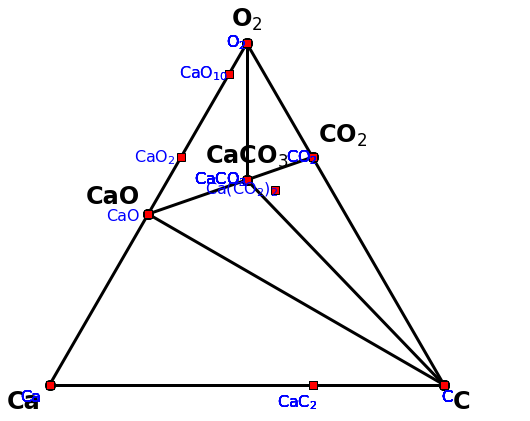

In [3]:
#Let's show all phases, including unstable ones
plotter = PDPlotter(pd, show_unstable=0.2, backend="matplotlib")
plotter.show()

## Calculating energy above hull and other phase equilibria properties

In [4]:
import collections

data = collections.defaultdict(list)
for e in entries:
    decomp, ehull = pd.get_decomp_and_e_above_hull(e)
    data["Materials ID"].append(e.entry_id)
    data["Composition"].append(e.composition.reduced_formula)
    data["Ehull"].append(ehull)    
    data["Decomposition"].append(" + ".join(["%.2f %s" % (v, k.composition.formula) for k, v in decomp.items()]))

from pandas import DataFrame
df = DataFrame(data, columns=["Materials ID", "Composition", "Ehull", "Decomposition"])

print(df.head(30))

   Materials ID Composition     Ehull Decomposition
0     mp-683919           C  0.348528       1.00 C4
1    mp-1192619           C  1.918405       1.00 C4
2    mp-1095534           C  1.121473       1.00 C4
3     mp-568363           C  0.006369       1.00 C4
4     mp-611426           C  0.145817       1.00 C4
5    mp-1244913           C  0.993807       1.00 C4
6     mp-569517           C  0.144718       1.00 C4
7    mp-1095633           C  0.996891       1.00 C4
8         mp-47           C  0.161517       1.00 C4
9    mp-1096869           C  0.115985       1.00 C4
10    mp-579909           C  0.943116       1.00 C4
11    mp-568028           C  0.528978       1.00 C4
12    mp-568286           C  0.006304       1.00 C4
13    mp-632329           C  0.012229       1.00 C4
14   mp-1194362           C  1.502484       1.00 C4
15        mp-24           C  0.833089       1.00 C4
16   mp-1205283           C  0.697418       1.00 C4
17        mp-66           C  0.136413       1.00 C4
18   mp-1205